In [1]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Test the best s4U concentration for blastocyst

Late-blastocyst (E 4.5)

In [2]:
runs = ["20220729_EmbryoR10", "20230220_BlastocystC85", "20230220_BlastocystC86", "20230220_BlastocystC87"]
d = pd.read_csv("../../1_NanoNASCseq/reports/NanoNASCseq_Summary.csv")
d = d[["Late" in x for x in d["Label"]]]
d = d[d["Run"].isin(runs)]
d = d[d["UMIs"] >= 5000]
d = d[d["ActD"].isna()]
d = d[d["s4U"] != 200]
print("Total cells:", len(d))
print("s4U\tTime\tCells")
counter = Counter([(s4u, time) for s4u, time in d[["s4U", "Time"]].values])
for k, v in sorted(counter.items()):
    print(*k, v, sep="\t")

Total cells: 188
s4U	Time	Cells
0.0	3.0	37
100.0	3.0	3
300.0	3.0	34
400.0	3.0	46
500.0	3.0	35
600.0	3.0	33


s4U concentration: [0, 100, 300, 400, 500, 600]


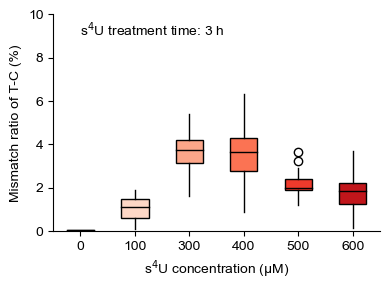

In [3]:
s4u_list = [int(k[0]) for k in sorted(counter.keys())]
print("s4U concentration:", s4u_list)
ratios_list = []
for s4u in s4u_list:
    tmp = d[(d["s4U"] == s4u) & (d["Time"] == 3)]
    ratios = tmp["TC.Ratio"].values * 100
    ratios_list.append(ratios)
    
cmap = matplotlib.colormaps["Reds"]
plt.figure(figsize=(4, 3))
for i, ratios in enumerate(ratios_list):
    ret = plt.boxplot([ratios], positions=[i], 
                      widths=0.5, showcaps=False, showfliers=True, showmeans=False, 
                      medianprops={"color": "black"}, 
                      patch_artist=True, boxprops={"facecolor": cmap(i * 40)})
xs = np.arange(len(s4u_list))
plt.xlim(min(xs) - 0.5, max(xs) + 0.5)
ylim = 10
plt.text(0, ylim * 0.9, "s$^4$U treatment time: 3 h")
plt.ylim(0, ylim)
plt.xticks(xs, list(map(str, s4u_list)))
plt.xlabel("s$^4$U concentration (μM)")
plt.ylabel("Mismatch ratio of T-C (%)")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("figures/best_s4u_condition.pdf", dpi=300)